# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаем датафрейм и смотрим на его содержимое
telecom_users_df = pd.read_csv('telecom_users.csv', index_col=0)
telecom_users_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


<AxesSubplot:>

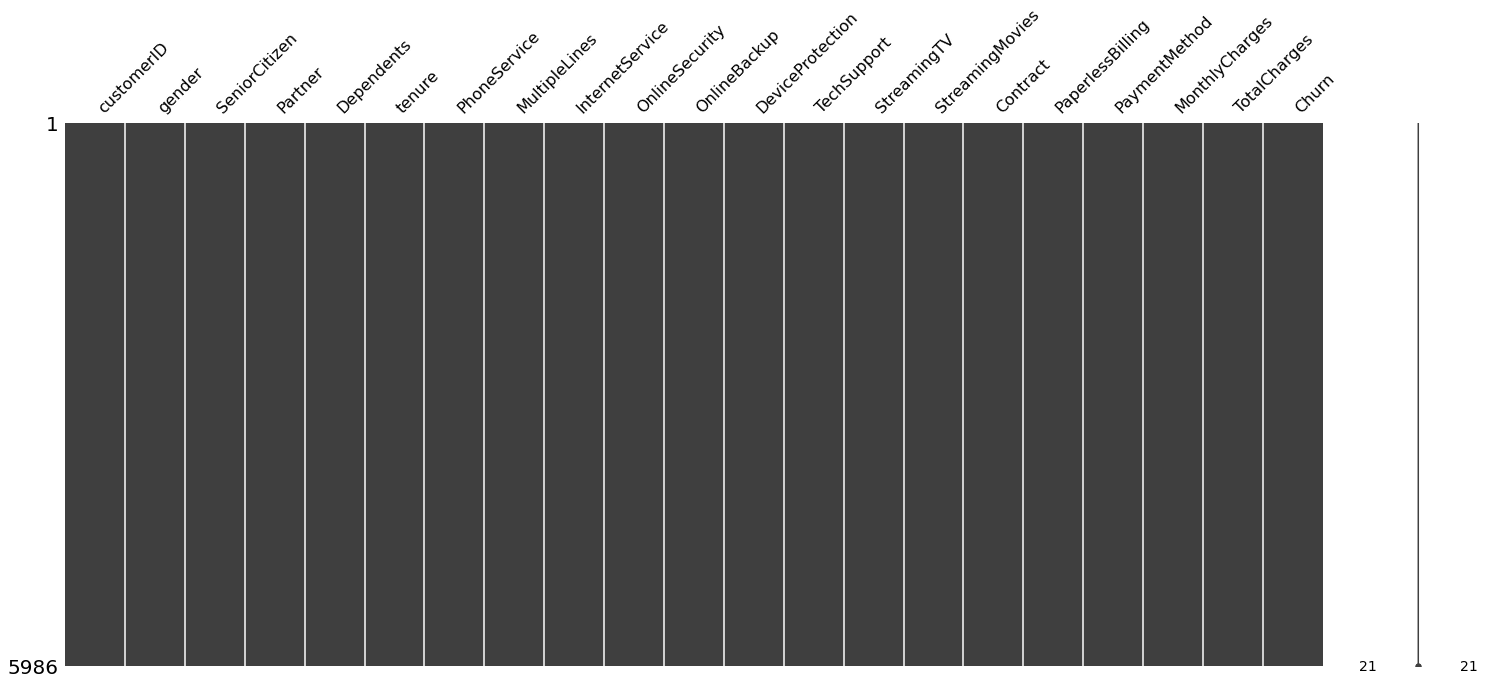

In [3]:
# Посмотрим есть ли пропущенные значения
msno.matrix(telecom_users_df)

Как следует из матрицы, пропущенные значения в датафрейме отсутствуют.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [4]:
# Посмотрим какие типы данных содержатся в датасете
telecom_users_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Как видно из полученной сводки, столбец SeniorCitizen отнесен к численным данным, хотя информация в нем содержится категориальная, преобразуем его к общему виду категориальных данных в датасете.

In [5]:
# Преобразуем столбец SeniorCitizen к общему виду категориальных данных
category = {0: 'No', 1: 'Yes'}
telecom_users_df['SeniorCitizen'] = telecom_users_df['SeniorCitizen'].map(category)

Датафрейм содержит в себе объекты типа object и численные признаки(int64, float64). Рассмотрим каждый из типов подробнее.

In [6]:
# Посмотрим характеристики численных признаков
telecom_users_df.describe(include=[np.number])

,tenure,MonthlyCharges
count,5986.000000,5986.000000
mean,32.468760,64.802213
std,24.516391,30.114702
min,0.000000,18.250000
25%,9.000000,35.650000
50%,29.000000,70.400000
75%,56.000000,89.900000
max,72.000000,118.750000


In [7]:
# Посмотрим характеристики категориальных признаков
telecom_users_df.describe(include=[np.object])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7010-BRBUU,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


In [8]:
# Посмотрим количество оттоков по отношению к общему числу клиентов
telecom_users_df[telecom_users_df['Churn'] == 'Yes']['customerID'].count()/telecom_users_df['customerID'].count()*100

26.511861009021047

**Первые очевидные результаты и выводы, которые мы можем сделать:**
* датасет полностью соответствует описанию, нет лишних значений в категориальных данных.
* зачастую подключены услуги телефонной связи на одну линию
* услугами онлайн безопасности, online backup, страховкой оборудования, услугами техподдержки, стриминговым ТВ, фильмами пользователи предпочитают не пользоваться.
* наиболее часто пользуются провайдером Fiber optic.
* распространенный тип договора Month-to-month.
* клиенты активно пользуются безбумажным биллингом.
* популярный метод оплаты Electronic check.
* средний чек по месячной оплате услуг варьируется от 18.25 до 118.75 у.е. и составляет, примерно, 64 у.е.
* самые "старенькие" клиенты пользуются услугами порядка 6 лет.
* отток за весь период составляет 26% от общего числа пользователей.

**Рассмотрим подробнее категории людей, пользующихся услугами компании.**

In [9]:
# Посмотрим кол-во женщин и мужчин
telecom_users_df['gender'].value_counts().to_frame()

,gender
Male,3050
Female,2936


In [10]:
# Посмотрим кол-во пользователей среди пенсионеров
seniors = telecom_users_df['SeniorCitizen'].value_counts().to_frame().reset_index()
seniors['SeniorsPercent'] = seniors['SeniorCitizen']/seniors['SeniorCitizen'].sum()*100
seniors.rename(columns={'index':'value'}, inplace=True)

# Посмотрим кол-во холостых и замужних пользователей 
partners = telecom_users_df['Partner'].value_counts().reset_index()
partners['PartnersPercent'] = partners['Partner']/partners['Partner'].sum()*100
partners.rename(columns={'index':'value'}, inplace=True)

# Посмотрим кол-во холостых и замужних пользователей 
depend = telecom_users_df['Dependents'].value_counts().reset_index()
depend['DependPercent'] = depend['Dependents']/depend['Dependents'].sum()*100
depend.rename(columns={'index':'value'}, inplace=True)

# Соединяем полученные таблицы
users = seniors.merge(partners, how='left', on='value')
users = users.merge(depend, how='left', on='value')
users

,value,SeniorCitizen,SeniorsPercent,Partner,PartnersPercent,Dependents,DependPercent
0,No,5020,83.862345,3082,51.486803,4195,70.080187
1,Yes,966,16.137655,2904,48.513197,1791,29.919813


**Выводы по пользователям**
* кол-во пользователей среди мужчин и женщин, примерно, одинаковое.
* на пенсионеров приходится одна пятая часть от всего числа пользователей.
* кол-во холостых и замужних пользователей не имеют сильных различий.
* треть пользователей имеет иждивенцев.

# 2. Исследование зависимостей и формулирование гипотез

Для начала необходимо подготовить данные для дальнейшей работы. Сделаем мы это кодированием категориальных признаков.

In [11]:
# Скопируем исходный датасет
df_encode = telecom_users_df.copy()

# Создадим список категориальных столбцов и удалим из него численные признаки
col_list = df_encode.columns.to_list()
col_list.remove('customerID')
col_list.remove('tenure')
col_list.remove('MonthlyCharges')
col_list.remove('TotalCharges')

In [12]:
# Преобразуем данные при помощи простейшего кодировщика
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Проходимся циклом по подготовленному списку фичей и преобразуем их
for col in col_list:
    df_encode[col] = encoder.fit_transform(df_encode[col])

In [13]:
# Так как столбец TotalCharges имеет тип object,
# его необходимо преобразовать к типу numeric
# В процессе выполнения работы выяснилось, что столбец имеет пустые строки
# Мы их просто удалим
df_encode['TotalCharges'].replace(' ', np.nan, inplace=True)
df_encode.dropna(subset=['TotalCharges'], inplace=True)
df_encode['TotalCharges'] = pd.to_numeric(df_encode['TotalCharges'])
df_encode.reset_index(drop=True, inplace=True)

# Посмотрим на полученный датафрейм
df_encode.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1734.65,0
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,3973.20,0
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,238.50,0
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,119.50,0


**Значения переменных после кодирования:**
* gender 1 - Male, 0 - Female
* SeniorCitizen 1 - Yes, 0 - No
* Partner 1 - Yes, 0 - No
* Dependents 1 - Yes, 0 - No
* PhoneService 1 - Yes, 0 - No
* MultipleLines 2 - Yes, 1 - No phone service, 0 - No
* InternetService 2 - No, 1 - Fiber optic, 0 - DSL
* OnlineSecurity 2 - Yes, 1 - No internet service, 0 - No
* OnlineBackup 2 - Yes, 1 - No internet service, 0 - No
* DeviceProtection 2 - Yes, 1 - No internet service, 0 - No
* TechSupport 2 - Yes, 1 - No internet service, 0 - No
* StreamingTV 2 - Yes, 1 - No internet service, 0 - No
* StreamingMovies 2 - Yes, 1 - No internet service, 0 - No
* Contract 0 - Month-to-month, 1 - One year, 2 - Two year
* PaperlessBilling 1 - Yes, 0 - No
* PaymentMethod 3 - Mailed check, 2 - Electronic check, 1 - Credit card(automatic), 0 - Bank transfer(automatic)
* Churn 1 - Yes, 0 - No

Теперь приступим к исследованию зависимостей

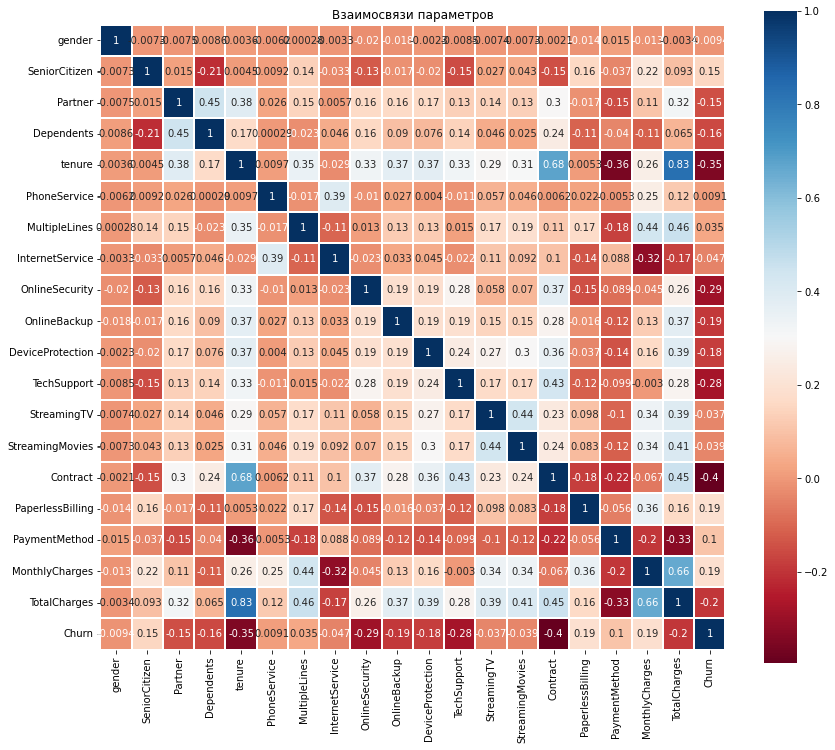

In [14]:
# Подготовим датасет для построения графиков
df_for_plot = df_encode.drop(columns=['customerID'])

# Строим тепловую карту для просмотра зависимостей
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Взаимосвязи параметров')

# Визуализируем тепловую карту
sns.heatmap(df_for_plot.corr(),linewidths=0.2, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Наблюдаются следующие зависимости:
* слабая обратная корреляция наблюдается между признаками tenure и PaymentMethod, tenure и Churn, contract и Churn
* слабая корреляция наблюдается между подключенными пакетами услуг и tenure, contract и TechSupport, MontlyCharges и некоторыми пакетами услуг.
* средняя корреляция между Сontract и tenure.

**Гипотезы:**
* чем дольше человек пользуется услугами компании, тем больше услуг он подключает в дальнейшем.
* чем дольше человек пользуется услугами компании, тем на бОльший срок он заключает договор.
* способ оплаты зависит от того как долго клиент пользуется услугами компании.
* чем на меньший срок клиент заключает договор, то существует большая вероятность, что он перестанет пользоваться услугами компании
* чем меньше клиент пользуется услугами компании, тем вероятнее произойдет отток.

**Проверка первой гипотезы**

Чем дольше человек пользуется услугами компании, тем больше услуг он подключает в дальнейшем.

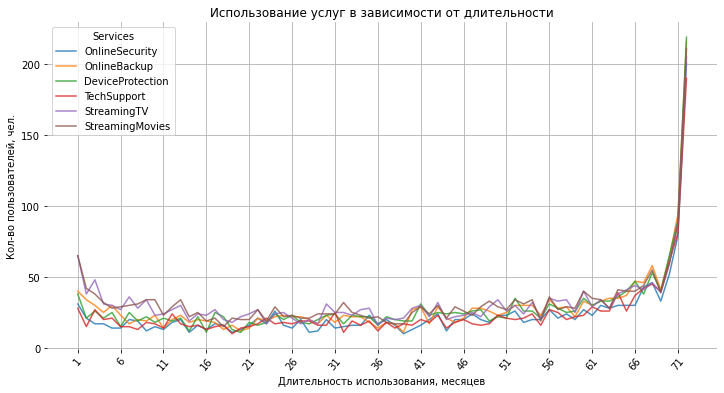

In [15]:
# Копируем подготовленный датафрейм, удаляем ненужные для подтверждения гипотезы столбцы,
# Выбираем те строки, в которых у пользователей подключен интернет
data = df_encode.copy()
data.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'PhoneService'], axis=1, inplace=True)
data = data[data['InternetService'] != 2]

# Создаем список с перечнем услуг
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#Создаем график
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Использование услуг в зависимости от длительности')
ax.set_ylabel('Кол-во пользователей, чел.')
ax.set_xlabel('Длительность использования, месяцев') 

# Строим визуализацию в цикле
for row in services:
    df = data[data[row]==2].groupby('tenure')[row].count()
    plt.plot(df.index, df.values,  label=row, alpha=0.8)
    plt.xticks(df.index[::5], labels=df.index[::5].astype(str), rotation=50)
    plt.box(False)
    ax.grid(which='both', alpha=1)
    ax.legend(title='Services')

На графике видны два пика: первый наблюдается в первые месяцы после того, как человек стал клиентом компании, второй, более крупный пик наблюдается после 70 месяцев использования услуг. Данные вплески похожи на распродажи услуг для новых, а также старых клиентов, что в целом, подтверждает гипотезу о том что, чем дольше человек пользуется услугами компании, тем больше услуг он подключает в дальнейшем.

**Проверка второй гипотезы**

Чем дольше человек пользуется услугами компании, тем на бОльший срок он заключает договор.

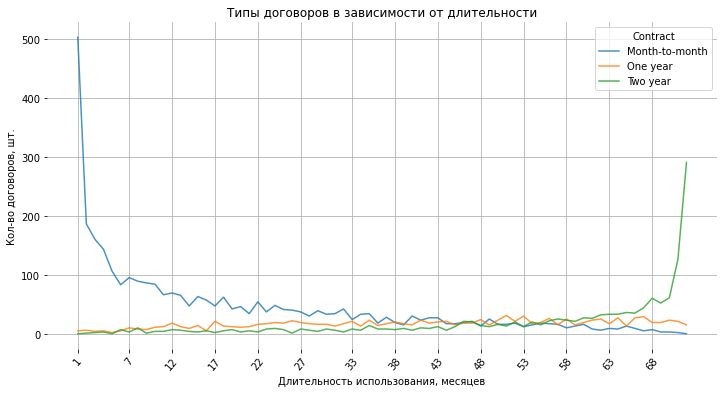

In [16]:
# Копируем подготовленный датафрейм
data = df_encode.copy()

# Создаем список с типами контрактов
contract_list = data['Contract'].unique().tolist()
contract_list.sort()

# Создаем словарь с рашифровкой значений
contract_dict = {0 : 'Month-to-month', 1 : 'One year', 2 : 'Two year'}

#Создаем график
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Типы договоров в зависимости от длительности')
ax.set_ylabel('Кол-во договоров, шт.')
ax.set_xlabel('Длительность использования, месяцев') 

# Строим визуализацию в цикле
for row in contract_list:
    df = data[data['Contract']==row].groupby('tenure')['Contract'].count()
    plt.plot(df.index, df.values,  label=contract_dict.get(row), alpha=0.8)
    plt.xticks(df.index[::5], labels=df.index[::5].astype(str), rotation=50)
    plt.box(False)
    ax.grid()
    ax.legend(title='Contract')

По графику очевидно, что когда человек только становится клиентом компании, он заключает договор на месяц, затем динамика договора Month-to-Month спадает, но в свою очередь возрастает кол-во договоров Two year. Гипотеза о том, что длительность договора обусловлена продолжительностью использования услуг - подтверждена.

**Проверка третьей гипотезы**

Способ оплаты зависит от того как долго клиент пользуется услугами компании.

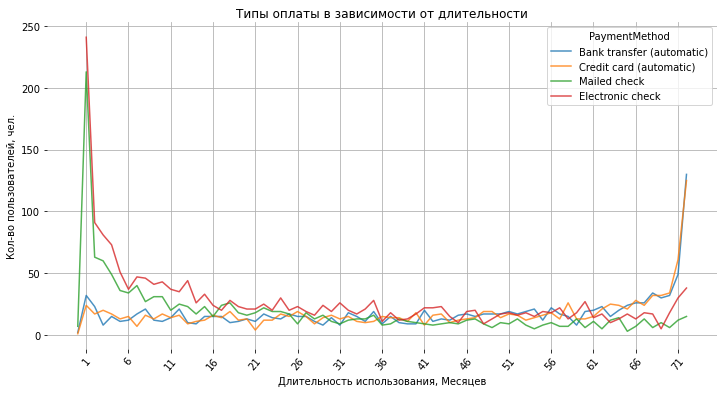

In [17]:
# Копируем датафрейм и производим его обработку
data = telecom_users_df.copy()
df = data[['tenure', 'PaymentMethod']]
df = df.groupby('tenure')['PaymentMethod'].value_counts().unstack().stack().reset_index()
df = df.rename(columns={0:'Value'})

# Формируем список методов оплаты
payments_list = df['PaymentMethod'].unique().tolist()

#Создаем график
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Типы оплаты в зависимости от длительности')
ax.set_ylabel('Кол-во пользователей, чел.')
ax.set_xlabel('Длительность использования, Месяцев') 

# Визуализируем график в цикле
for row in payments_list:
    df = data[data['PaymentMethod']==row].groupby('tenure')['PaymentMethod'].count()
    plt.plot(df.index, df.values,  label=row, alpha=0.8)
    plt.xticks(df.index[::5], labels=df.index[::5].astype(str), rotation=50)
    plt.box(False)
    ax.grid(which='both', alpha=1)
    ax.legend(title='PaymentMethod')

На графике видны два выплеска. Первый выплеск методов оплаты при помощи чеков наблюдается в начале срока сотрудничества клиента с компанией, затем все методы оплаты сравниваются по кол-ву человек, использующих их. Далее наблюдается второй всплеск автоматических методов оплаты у тех клиентов, которые давно пользуются услугами. Всё это говорит о том, что гипотеза подтверждается.

**Проверка четвертой гипотезы**

Чем на меньший срок клиент заключает договор, то существует большая вероятность, что он перестанет пользоваться услугами компании.

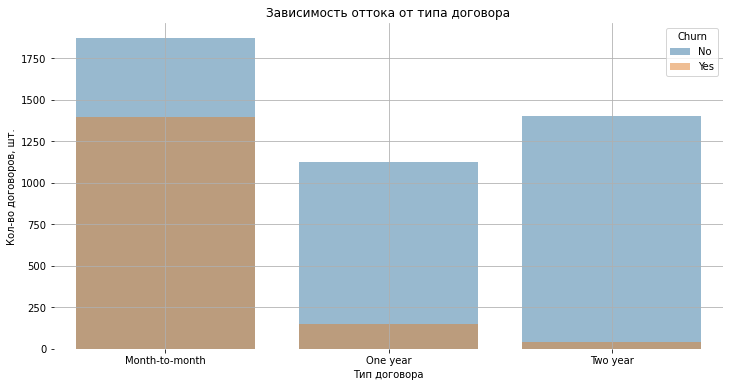

In [18]:
# Копируем датафрейм и производим его обработку
data = telecom_users_df.copy()
df = data[['Churn', 'Contract']]
df = df.groupby('Contract')['Churn'].value_counts().unstack().stack().reset_index()
df = df.rename(columns={0:'Value'})

#Создаем график
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Зависимость оттока от типа договора')

# Визуализируем график
sns.barplot(df.Contract, df.Value,
            hue='Churn',
            dodge=False,
            data = df, 
            alpha=0.5).set(ylabel='Кол-во договоров, шт.', xlabel='Тип договора')
plt.box(False)
ax.grid(which='both', alpha=1)
ax.legend(title='Churn')
plt.show()

Судя по графику выдвинутая гипотеза подтверждается, т.к. большое кол-во оттоков имеется именно на договорах Month-to-Month, но стоит отметить, что больше всего клиентов сосредоточено именно на таком типе договора. Поскольку разница по оттоку сильно выражена между типами договоров, то нельзя сказать, что это действие закона больших чесел.

**Проверка пятой гипотезы**

Чем меньше клиент пользуется услугами компании, тем вероятнее произойдет отток.

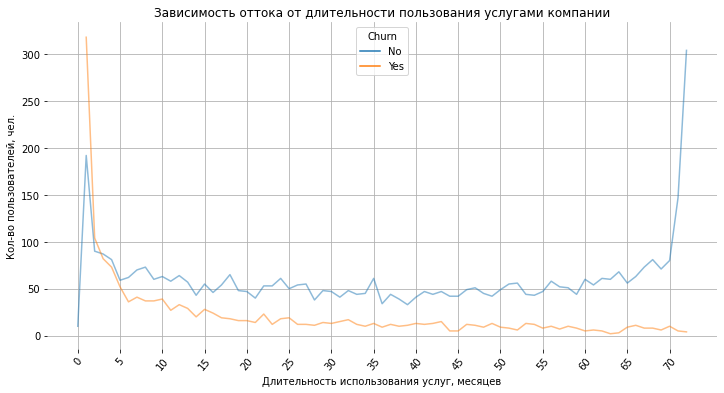

In [19]:
# Копируем датафрейм и производим его обработку
data = telecom_users_df.copy()
df = data[['Churn', 'tenure']]
df = df.groupby('tenure')['Churn'].value_counts().unstack().stack().reset_index()
df = df.rename(columns={0:'Value'})

# Создадим список с метками
xticks_list = df.tenure.unique().tolist()

#Создаем график
plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Зависимость оттока от длительности пользования услугами компании')

# Визуализируем график
sns.lineplot(df.tenure, df.Value,
             hue='Churn',
             data = df, 
             alpha=0.5).set(ylabel='Кол-во пользователей, чел.', xlabel='Длительность использования услуг, месяцев')
plt.xticks(xticks_list[::5], labels=xticks_list[::5], rotation=50)
plt.box(False)
ax.grid(which='both', alpha=1)
ax.legend(title='Churn')
plt.show()

На графике можно увидеть 2 пика на первых месяцах использования услуг компании и последних (72 месяца). Первый всплеск синей линии на графике говорит о том, что среди многих новых клиентом оттока не происходит, затем линия сглаживается и на отметке более 70 месяцев виден второй пик. Всплеск оранжевой линии виднеется в первые месяцы пользования услуг, линия выражает кол-во клиентов, которые перестали пользоваться услугами компании. Исходя из вышеописанного гипотеза подтверждается.

**Выводы**

Почти все признаки датасета переплетены между собой, наблюдаются прямые и обратные зависимости, поэтому необходимо задействовать их все для построения хороших моделей.

P.S. Пробовала оставлять признаки, коррелирующие с целевыми признаками, а также те признаки, которые рассматривались в гипотезах, в особенности tenure и contract, но модели без остальных данных получаются с плохим скором. Дополнительно пробовала применять PCA для снижения размерности, но итоговый скор почти меняется не в лучшую сторону. Поэтому решила остановиться на этом варианте выполнения работы.

# 3. Построение моделей для прогнозирования оттока

In [20]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [21]:
# Подготавливаем данные
train_targets = df_encode['Churn']
train_values = df_encode.drop(columns=['Churn', 'customerID'])
# train_values = df_encode[['Contract', 'tenure']]


# Осуществляем их разбивку на тренировочные и тестовые,
# установим разбивку 70 на 30, чтобы модели не переобучились
x_train, x_test, y_train, y_test = train_test_split(
                                    train_values,
                                    train_targets,
                                    test_size=.3,
                                    random_state=17)

In [22]:
# В качестве одной из моделей выберем GradientBoostingClassifier
# т.к.он дает модель прогнозирования в виде ансамбля слабых моделей,
# которые обычно являются деревьями решений, что для нашей задачи классификации
# будет хорошим решением.
gbc = GradientBoostingClassifier(random_state=17)

# Возьмем еще одну модель градиентного бустинга
xgb = XGBClassifier(random_state=17, n_jobs=-1)

# Случайные леса хорошо подойдут для работы с несколькими числовыми и категориальными
# признаками, даже если они обладают различным масштабом
rfc = RandomForestClassifier(random_state=17)

# Для сравннения добавим обычную модель логистической регрессии
lr = LogisticRegression(random_state=17)

# Создадим список моделей
models_list = [gbc, rfc, lr, xgb]

# Зададим параметры алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 1, 0.1)}
rfc_params = {'n_estimators': range(10, 100, 10), 
              'min_samples_leaf': range(1, 5)}
lr_params = {'C': np.arange(0.5, 1, 0.1)}
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

# Добавим перекрестную проверку
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

# Список с параметрами базовых алгоритмов
param_list = [gbc_params, rfc_params, lr_params, xgb_params]

In [23]:
# Подберем параметры моделей при помощи GridSearch с 5-кратной кросс-валидацией
# Сразу веведем скор моделей на тренировочных данных
for i, model in enumerate(models_list):
    model_grid = GridSearchCV(model, param_grid=param_list[i], cv=skf)
    my_model = model_grid.fit(x_train, y_train)
    print('{} best params: {}, best score {}'.format(model, my_model.best_params_, my_model.best_score_))

GradientBoostingClassifier(random_state=17) best params: {'learning_rate': 0.1}, best score 0.7965632556464474
RandomForestClassifier(random_state=17) best params: {'min_samples_leaf': 3, 'n_estimators': 70}, best score 0.7968027759199237
LogisticRegression(random_state=17) best params: {'C': 0.7}, best score 0.80086461673898
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, predictor=None, rand

In [23]:
# Обучаем модели 
gbc = GradientBoostingClassifier(random_state=17, learning_rate=0.1)
gbc.fit(x_train, y_train)

xgb = XGBClassifier(random_state=17, n_jobs=-1, n_estimators=35, eta=0.30000000000000004, min_child_weight=8, subsample=0.1)
xgb.fit(x_train, y_train)

rfc = RandomForestClassifier(random_state=17, n_estimators=70, min_samples_leaf=3)
rfc.fit(x_train, y_train)

lr = LogisticRegression(random_state=17, C=0.7)
lr.fit(x_train, y_train)

LogisticRegression(C=0.7, random_state=17)

# 4. Сравнение качества моделей 

Посмотрим на 2 метрики качества работы моделей классификации - accuracy и precision.

In [24]:
# Создадим список моделей
models_list = [gbc, rfc, lr, xgb]

# Импортируем accuracy_score
from sklearn.metrics import accuracy_score

# Пройдемся цмклом по моделям и посмотрим лучший скор
for model in models_list:
    model_predict = model.predict(x_test)
    accuracy = accuracy_score(model_predict, y_test)
    print('{} accuracy: {}'.format(model, accuracy))

GradientBoostingClassifier(random_state=17) accuracy: 0.7941996653653095
RandomForestClassifier(min_samples_leaf=3, n_estimators=70, random_state=17) accuracy: 0.7941996653653095
LogisticRegression(C=0.7, random_state=17) accuracy: 0.7908533184606804
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.30000000000000004, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=8, missing=nan,
              monotone_constraints='()', n_estimators=35, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=17,
              reg_alpha=0, ...) accuracy: 0.798661461238

In [25]:
# Импортируем precision_score
from sklearn.metrics import precision_score

# Пройдемся цмклом по моделям и посмотрим лучший скор
for model in models_list:
    model_predict = model.predict(x_test)
    accuracy = precision_score(model_predict, y_test)
    print('{} precision: {}'.format(model, accuracy))

GradientBoostingClassifier(random_state=17) precision: 0.5
RandomForestClassifier(min_samples_leaf=3, n_estimators=70, random_state=17) precision: 0.48945147679324896
LogisticRegression(C=0.7, random_state=17) precision: 0.5590717299578059
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.30000000000000004, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=8, missing=nan,
              monotone_constraints='()', n_estimators=35, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=17,
              reg_alpha=0, ...) precision: 0.5274261603375527


**Выводы**

Самый лучший скор на тренировочных и тестовых данных показал XGBClassifier, точность составляет почти 80%, что является не плохим показателем, но и не слишком приемлемым. 

Следующими по точности являются модели градиентного бустинга и случайный лес. Показатели точности между названными моделями не сильно разнятся. 

Последней по метрике accuracy, ожидаемо, является модель логистической регрессии, но в свою очередь, она имеет самый высокий precision score - 0.559, тогда как у других моделей он составляет 0.5 ± 0.02.

Все модели, судя по метрикам, нормально обучились, т.к. скор на тренировочных и тестовых данных имеет, примерно, одинаковые величины.

В ходе работы были применены основные мотодики улучшения работы моделей, а именно, обработка пропущенных значений, отбор признаков, алгоритмы ансамблевого обучения, подбор гиперпараметров моделей, но все методики не принесли ожидаемой точности. Возможно, признаки датасета не слишком информативны для построения более точной модели, или же требуется инженерия признаков, либо экспертная оценка.